# <h1><center>**`Employee Salaries Project`**</center></h1>

### **`Problem Statement`**


To predict the salary of employee based on the information provided in the dataset.

- ### `How will the company profit from this solution?`
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

- ### `How will the employee profit from this solution?`

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



Dataset link: https://www.kaggle.com/datasets/pavanelisetty/salarypredictions
### `Dataset Desciption`

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# Load the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv("train_dataset.csv")
train_data_salaries = pd.read_csv("train_salaries.csv")
test_data = pd.read_csv("test_dataset.csv")

In [3]:
# print head of train data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
# print head of train data salaries
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# print test head
test_data.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
# Adding salary data to train_dataset
train_data['salary'] = train_data_salaries['salary']


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [7]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [8]:
# get all column names

for i in train_data.columns:
    print(i)


jobId
companyId
jobType
degree
major
industry
yearsExperience
milesFromMetropolis
salary


## Knows more about the data in the columns like data type it contains and total samples of each

In [9]:
# Check which columns are having categorical, numerical or boolean values of train_dataset

train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [10]:
# Check which columns are having categorical, numerical or boolean values of test_dataset

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [11]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  

train_data.describe()


,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [12]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()


,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


## Get the total number of samples in the dataset using the len() function

In [13]:
# len of train and test dataset

print("train data length",len(train_data))
print("test data length",len(test_data))


train data length 1000000
test data length 1000000


## Get unique values

In [14]:
for i in train_data.columns:
    print(i, ":" , len(train_data[i].unique()))
    

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 280


In [15]:
# get how many unique values are in train_dataset

train_data.nunique()


jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [16]:
# get how many unique values are in test_dataset
for i in test_data.columns:
    print(i, ":" , len(test_data[i].unique()))
    



jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [17]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()



jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [18]:
 # Check for missing values in all the columnns of the test_dataset

test_data.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [19]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(columns=['jobId','companyId'])

train_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [20]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(columns=['jobId','companyId'])
test_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [21]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for i in train_data.columns:
    if train_data[i].dtypes == 'object':
        categorical_list.append(i)
    elif train_data[i].dtypes == 'int64':
        var_list.append(i)
    else:
        var_list.append(i)




In [22]:
categorical_list

['jobType', 'degree', 'major', 'industry']

In [23]:
var_list

['yearsExperience', 'milesFromMetropolis', 'salary']

## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [24]:
# Correlation metrix using pandas
corr = train_data.corr()
corr.style



,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

[Text(0.5, 0, 'yearsExperience'),
 Text(1.5, 0, 'milesFromMetropolis'),
 Text(2.5, 0, 'salary')]

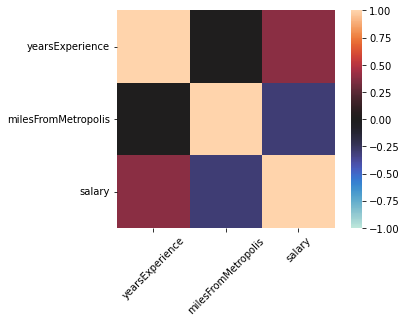

In [25]:
# Correlation metrix using seaborn
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)








## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [26]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2]) 
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b =  chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows =  len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f= (no_of_rows-1)* (no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df = degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x =chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Accept H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Accept H0,There is no relationship between 2 categorical variables")

In [27]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset

for x in categorical_list:
    for y in categorical_list:
        if y != x:
            print('chi-square test on : ',x,' ',y,'\n')
            perform_chi_square_test(x,y)
            print("----------------------------------------------------------------------------")
            







chi-square test on :  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  50117.72406771936
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
----------------------------------------------------------------------------
chi-square test on :  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16703.025256041707
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
----------------------------------------------------------------------------
chi-square test on :  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  14.913329934821567
critical_value: 58.12403768086803
p-value: 0.9999643570205455
Accept H0,There is no relation

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


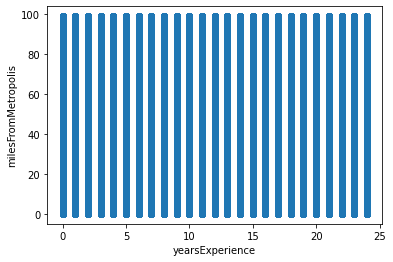

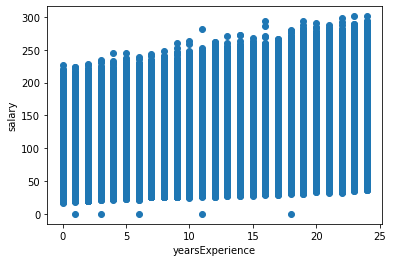

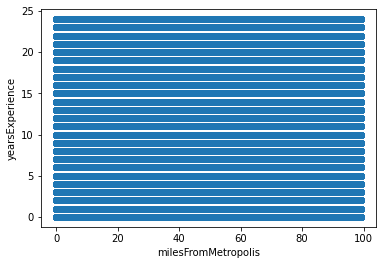

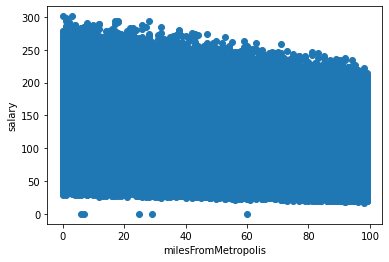

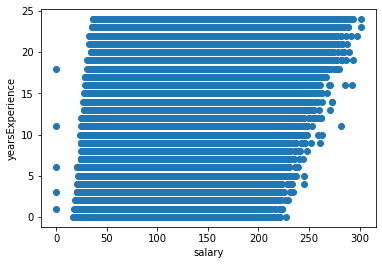

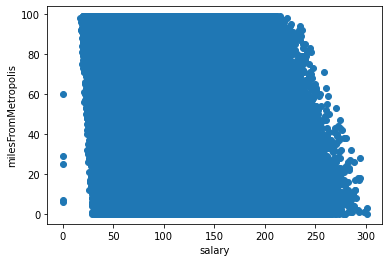

In [28]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    # code below
        plt.figure()
        plt.xlabel(x)
        plt.ylabel(y)
        plt.scatter(train_data[x],train_data[y])

# Loop through the different columns 
for a in var_list:
    for b in var_list:
        if a!=b:
            plot_scatter(a,b)
            
    






From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

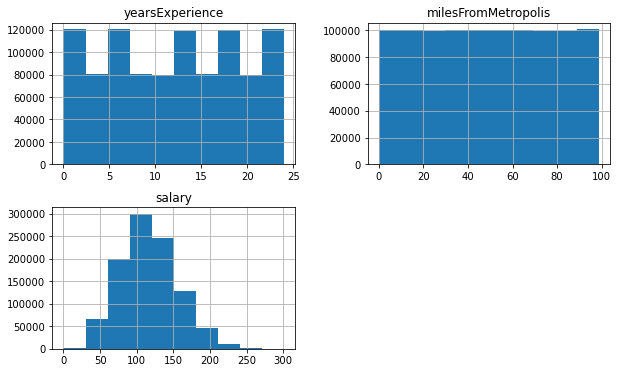

In [29]:
# Histogram using pandas 

train_data.hist(figsize=(10,6))


From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## groupby

You can use groupby to chunk up your data into subsets for further analysis.

In [30]:
# goup data by jobType and plot count plot





a=train_data.groupby('jobType').count()
a

,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobType,,,,,,
CEO,124778,124778,124778,124778,124778,124778
CFO,124369,124369,124369,124369,124369,124369
CTO,125046,125046,125046,125046,125046,125046
JANITOR,124971,124971,124971,124971,124971,124971
JUNIOR,124594,124594,124594,124594,124594,124594
MANAGER,125121,125121,125121,125121,125121,125121
SENIOR,125886,125886,125886,125886,125886,125886
VICE_PRESIDENT,125235,125235,125235,125235,125235,125235


<AxesSubplot:xlabel='jobType'>

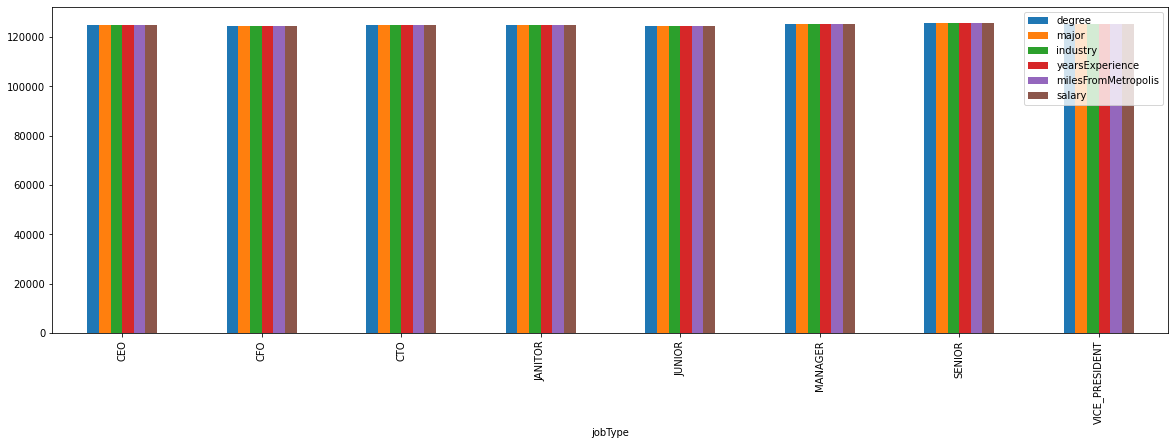

In [31]:
a.plot(kind = 'bar' , figsize = (20,6))

from above graph:
1. All data for each jobType is distributed equally.

<AxesSubplot:xlabel='degree'>

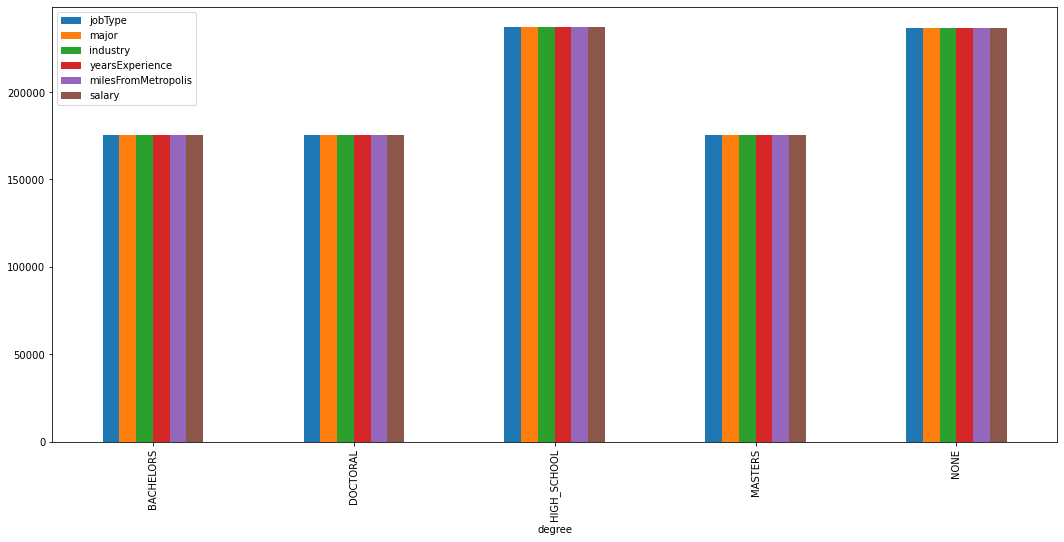

In [32]:
# goup data by degree and plot count plot


train_data.groupby('degree').count().plot(kind = 'bar' , figsize = (18,8))



From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

<AxesSubplot:xlabel='major'>

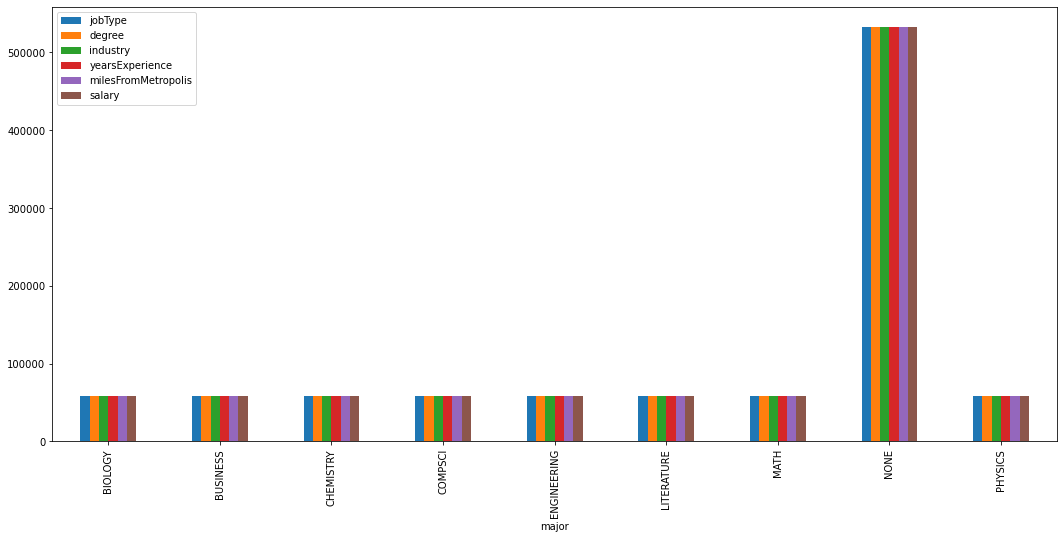

In [33]:
# goup data by major and plot count plot


train_data.groupby('major').count().plot(kind = 'bar' , figsize = (18,8))



From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


<AxesSubplot:xlabel='industry'>

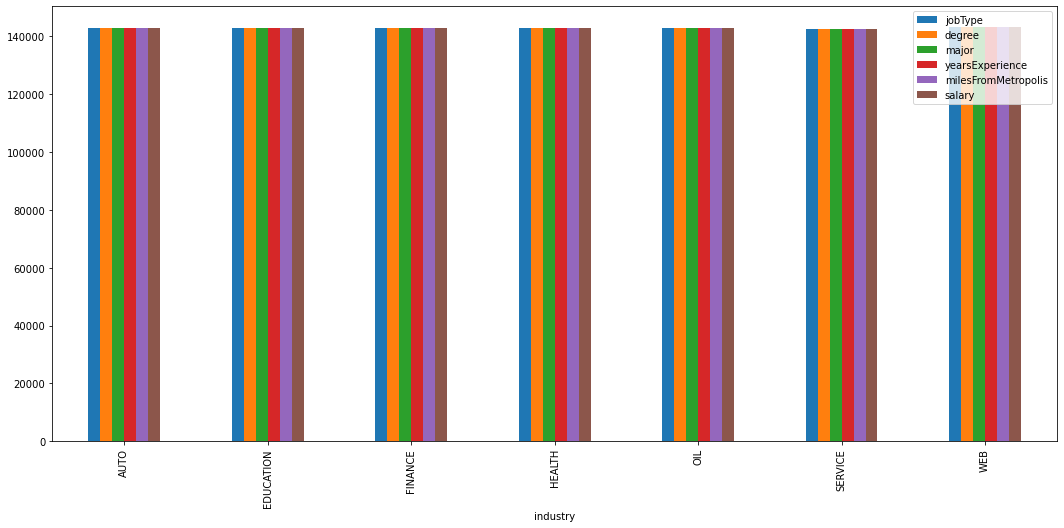

In [34]:
# goup data by industry and plot count plot

train_data.groupby('industry').count().plot(kind = 'bar' , figsize = (18,8))




from above graph:
1. All data for each industry is distributed equally.

<AxesSubplot:xlabel='yearsExperience'>

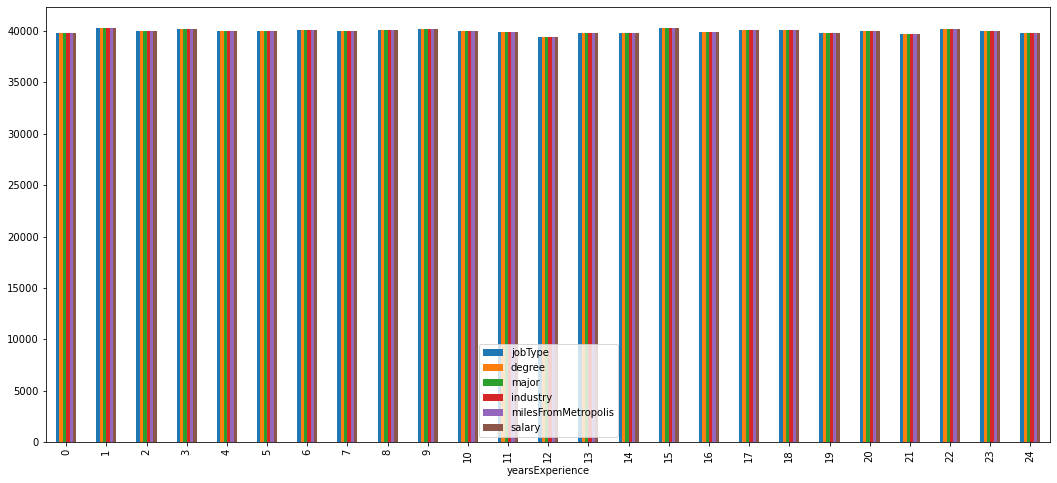

In [35]:
# goup data by yearsExperience and plot count plot

train_data.groupby('yearsExperience').count().plot(kind = 'bar' , figsize = (18,8))




from above graph:
1. All data for each yearsExperience is distributed almost equally.

<AxesSubplot:xlabel='milesFromMetropolis'>

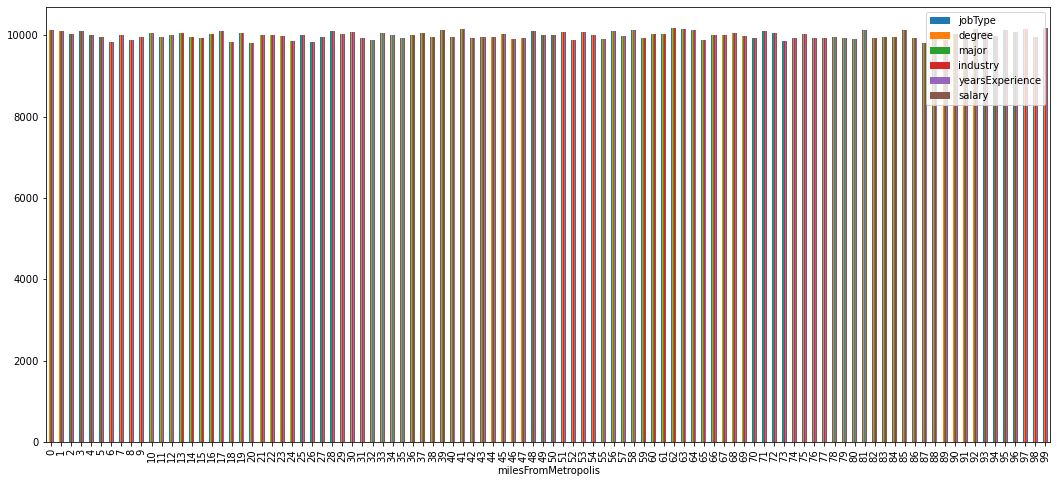

In [36]:
# goup data by milesFromMetropolis and plot count plot

train_data.groupby('milesFromMetropolis').count().plot(kind = 'bar' , figsize = (18,8))



from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

<AxesSubplot:xlabel='salary'>

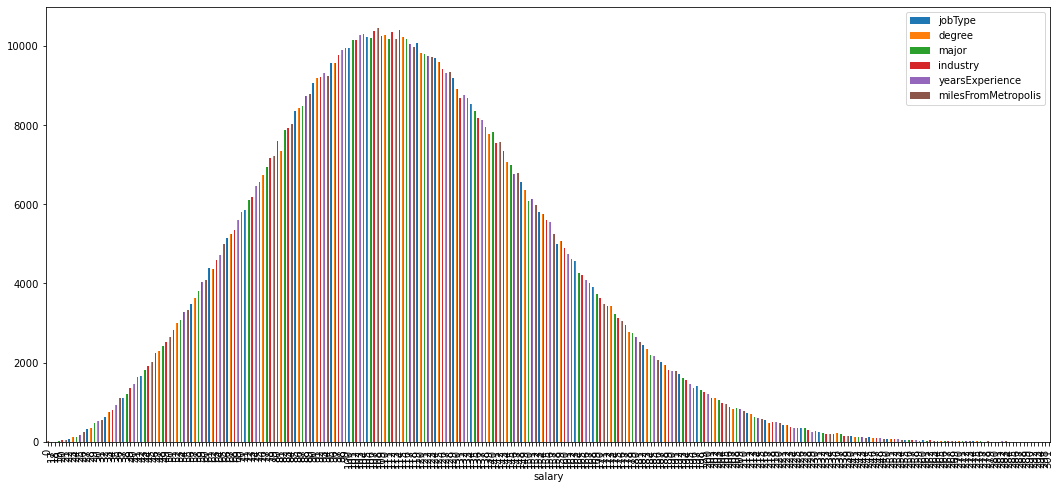

In [37]:
# goup data by salary and plot count plot



train_data.groupby('salary').count().plot(kind = 'bar' , figsize = (18,8))


from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel.

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<AxesSubplot:>

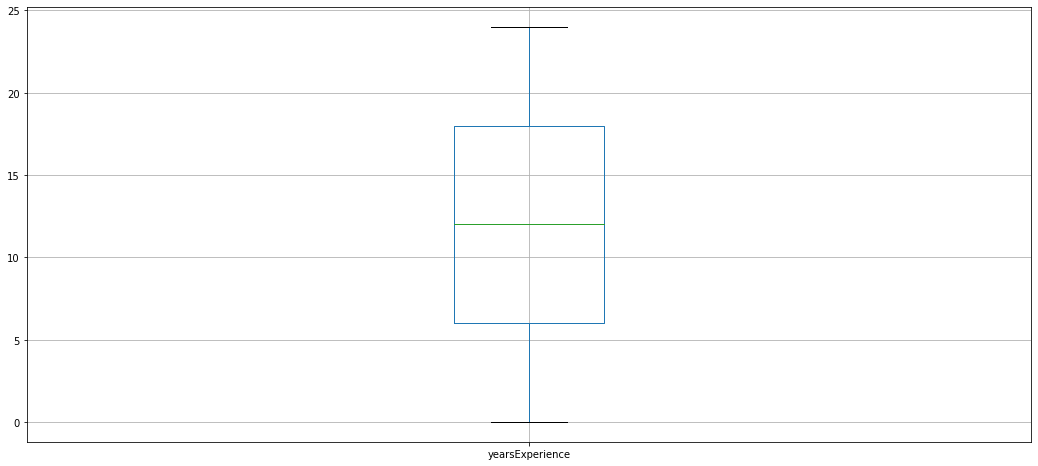

In [38]:
# box plot using pandas 
# box plot for yearsExperience column


train_data.boxplot(column='yearsExperience',figsize=(18,8))



from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

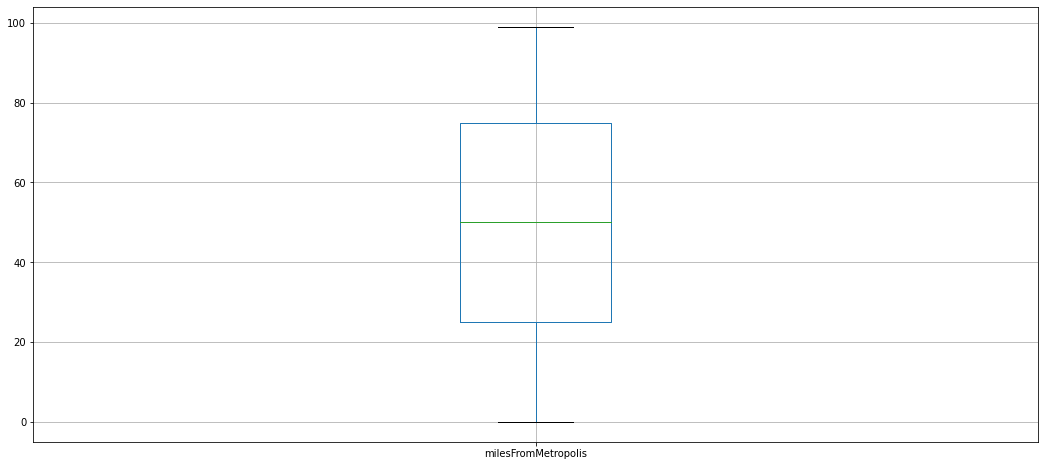

In [39]:
# box plot using pandas 
# box plot for milesFromMetropolies column


train_data.boxplot(column='milesFromMetropolis' , figsize=(18,8))



from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<AxesSubplot:>

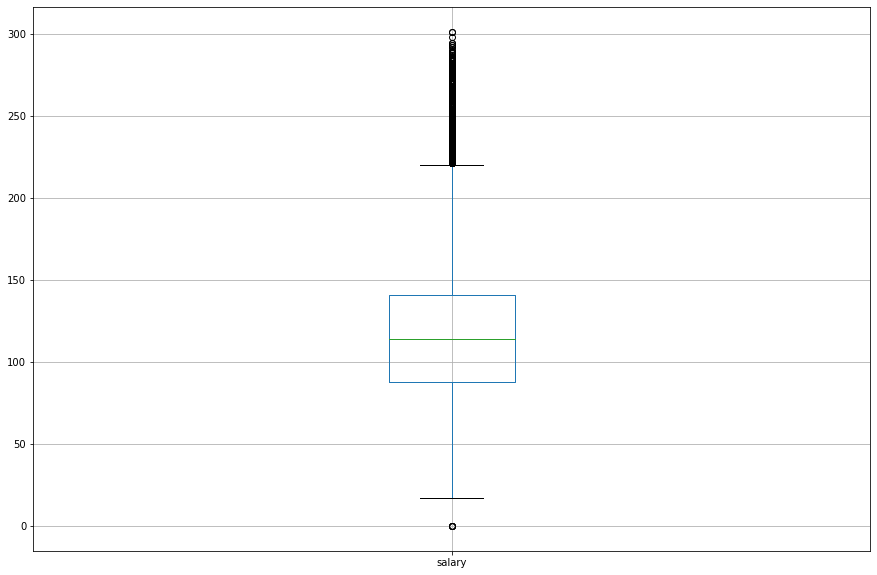

In [40]:
# box plot using pandas 
# box plot for salary column
train_data.boxplot(column='salary', figsize=(15, 10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

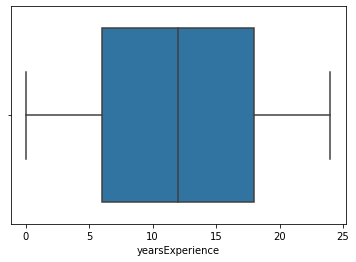

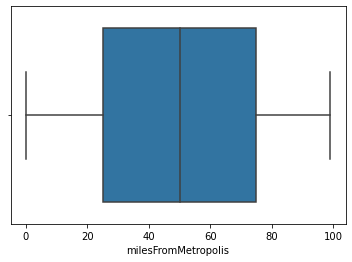

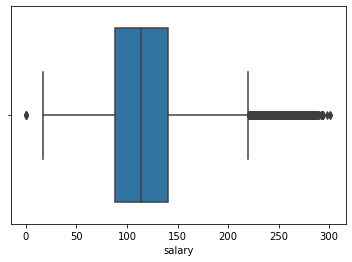

In [41]:
# box plot using seaborn 
# box plot for yearsExperience column
# box plot for mileFromMetropolis column
# box plot for salary column
for a in var_list:
    sns.boxplot(train_data[a])
    plt.show()







## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

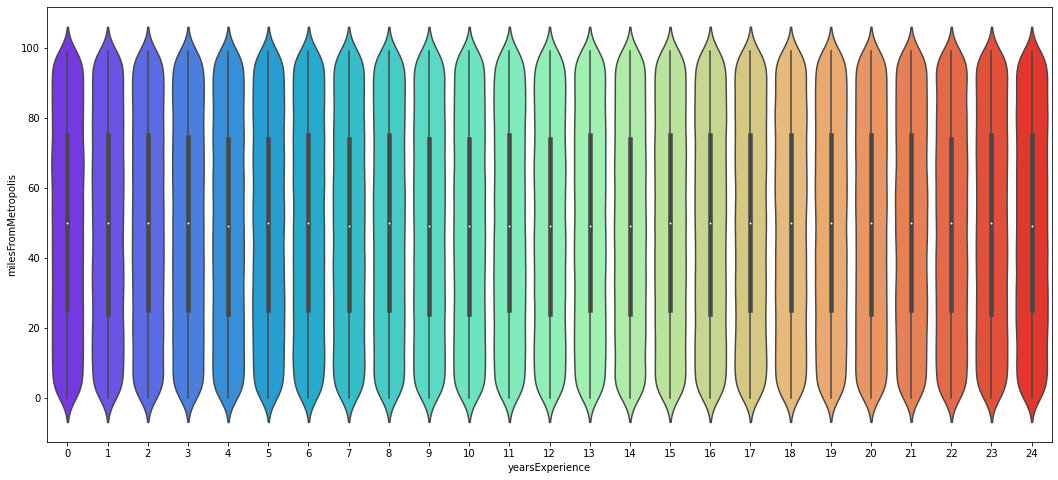

In [42]:
# violin plot for yearsExperience and milesFromMetropolis columns

plt.figure(figsize=(18,8))
sns.violinplot(x ='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')



from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

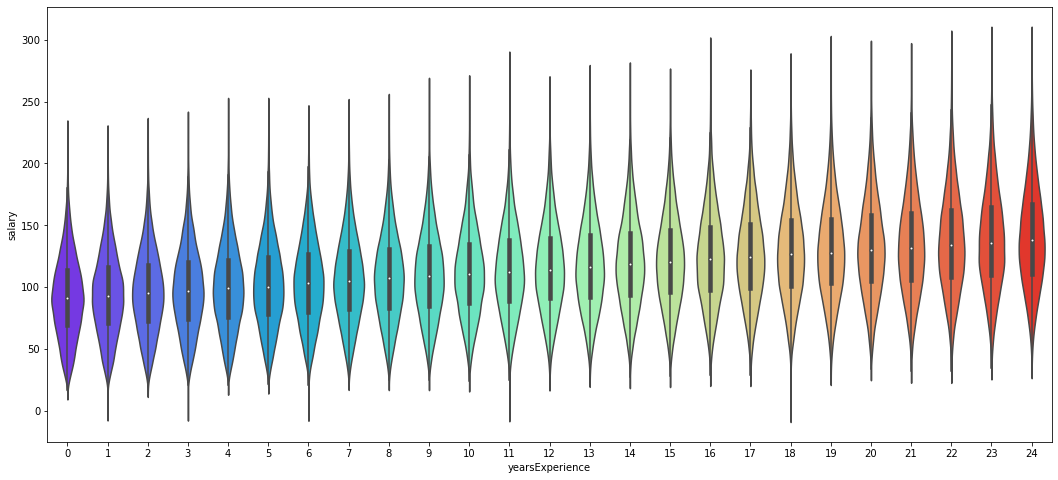

In [43]:
# violin plot for yearsExperience and salary columns


plt.figure(figsize=(18,8))
sns.violinplot(x ='yearsExperience',y='salary',data=train_data,palette='rainbow')


from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

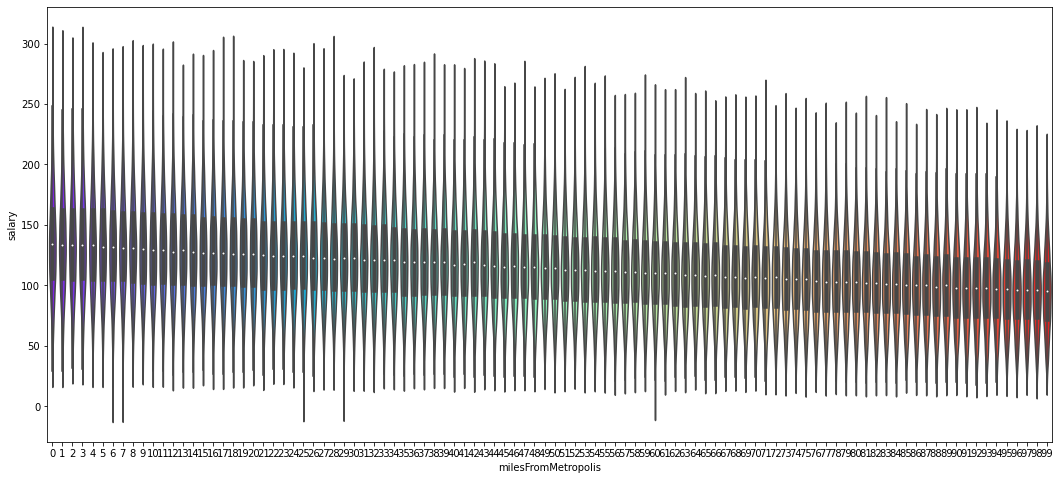

In [44]:
# violin plot for milesFromMetropolis from salary columns




plt.figure(figsize=(18,8))
sns.violinplot(x ='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

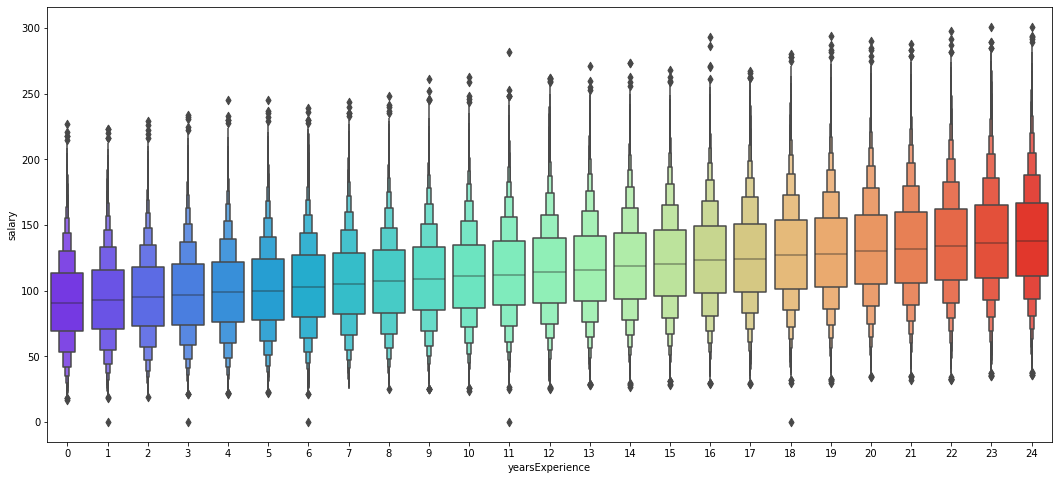

In [45]:
# boxen plot for yearsExperience and salary columns


plt.figure(figsize=(18,8))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')


from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

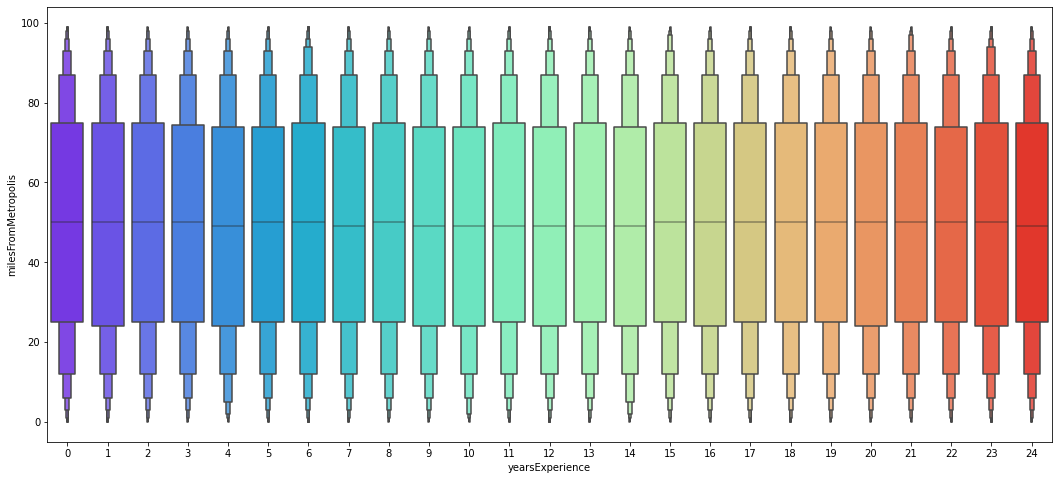

In [46]:
# boxen plot for yearsExperience and milesFromMetropolis columns


plt.figure(figsize=(18,8))
sns.boxenplot(x='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')



from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

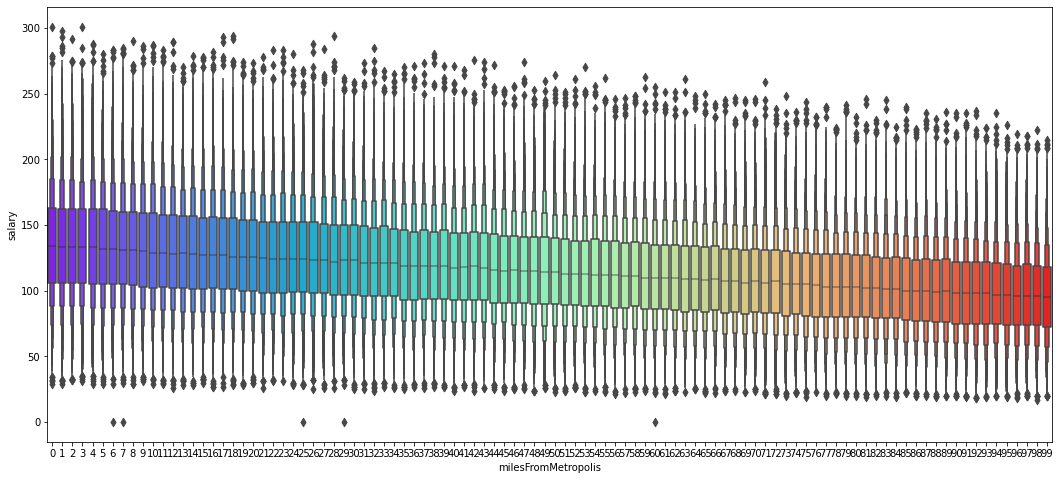

In [47]:
# boxen plot for milesFromMetropolis from salary columns

plt.figure(figsize=(18,8))
sns.boxenplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')




from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

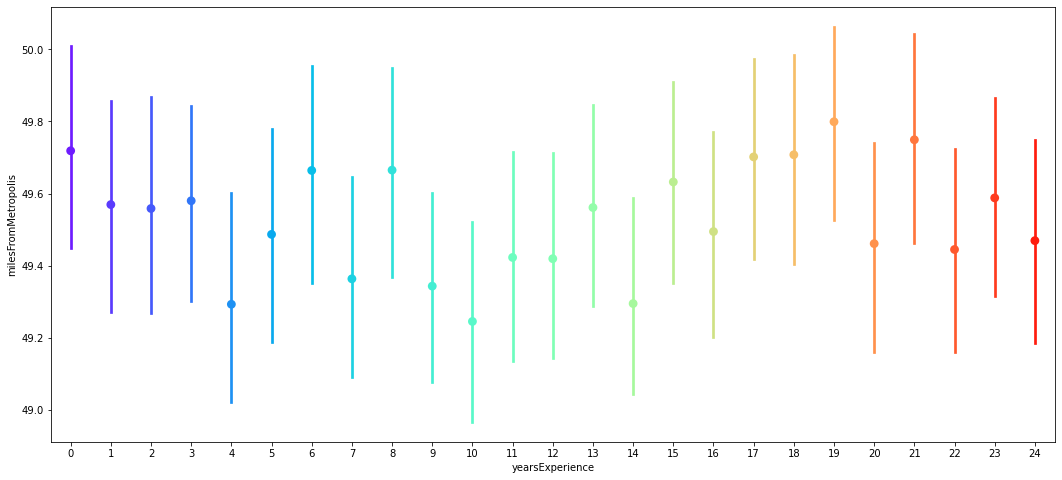

In [48]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(18,8))
sns.pointplot(x='yearsExperience',y='milesFromMetropolis',data=train_data,palette='rainbow')








From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

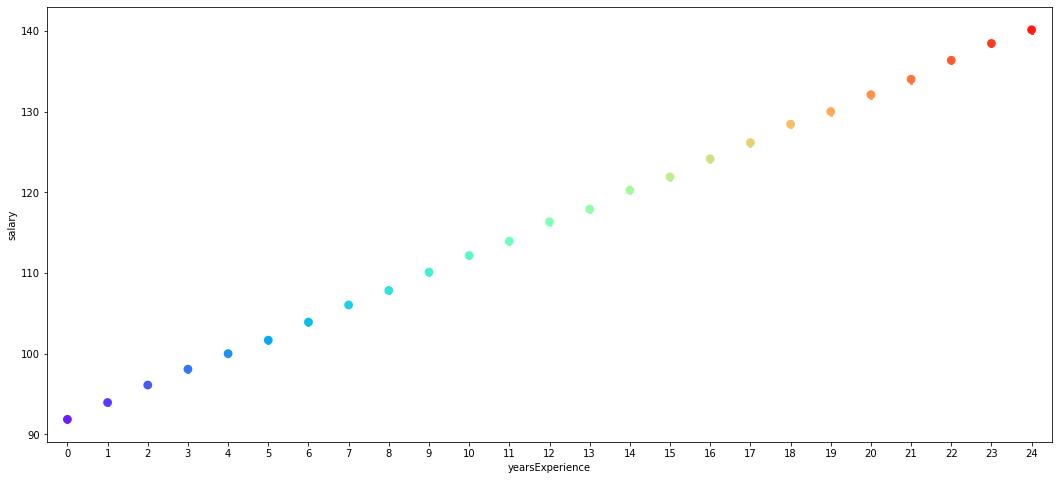

In [49]:
# point plot for yearsExperience and salary columns

plt.figure(figsize=(18,8))
sns.pointplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')






From above point plot

There is a increase in salary when there is a increase in yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

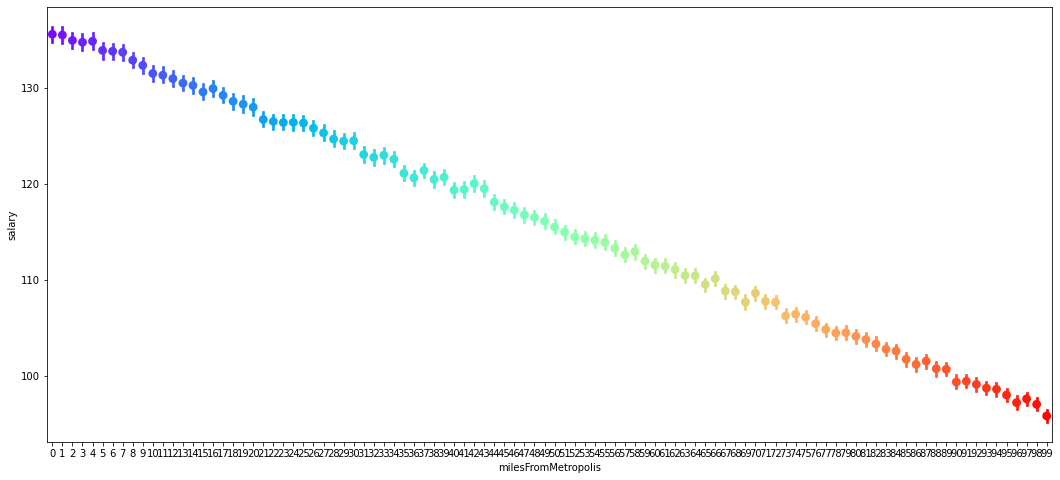

In [50]:
# point plot for milesFromMetropolis from salary columns
plt.figure(figsize=(18,8))
sns.pointplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')






From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

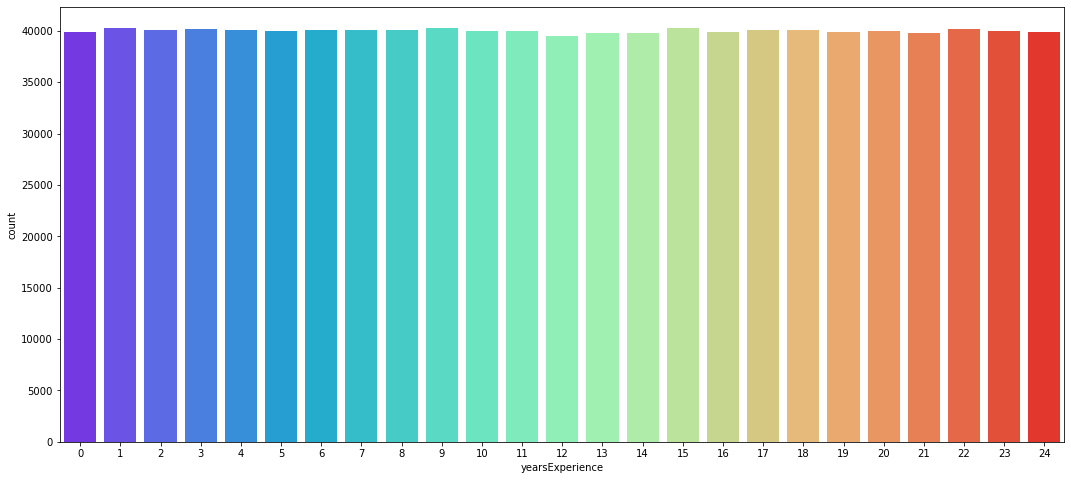

In [51]:
# count plot of whole datset based on yearsExperience


plt.figure(figsize=(18,8))
sns.countplot(x='yearsExperience',data=train_data,palette='rainbow')


From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

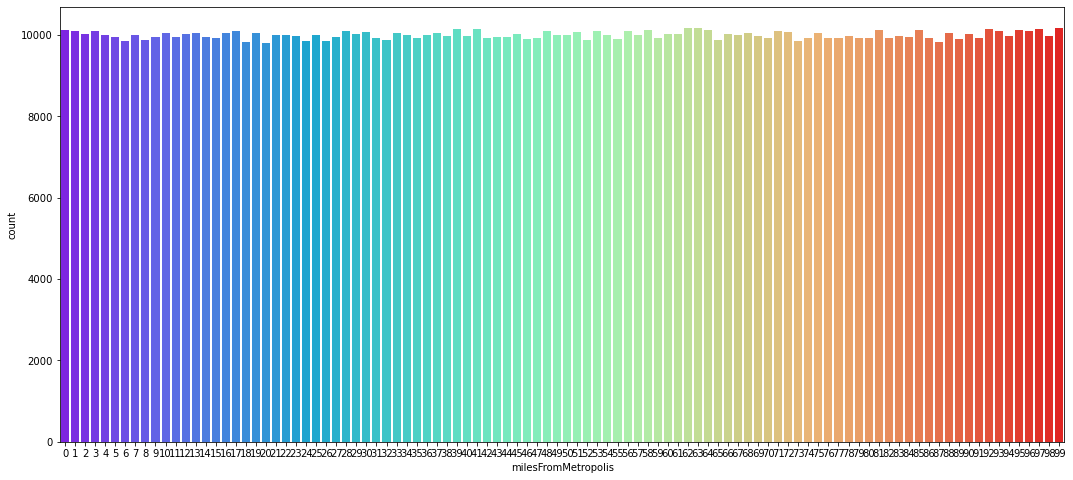

In [52]:
# count plot of whole datset based on milesFromMetropolis



plt.figure(figsize=(18,8))
sns.countplot(x='milesFromMetropolis',data=train_data,palette='rainbow')

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

<AxesSubplot:xlabel='salary', ylabel='count'>

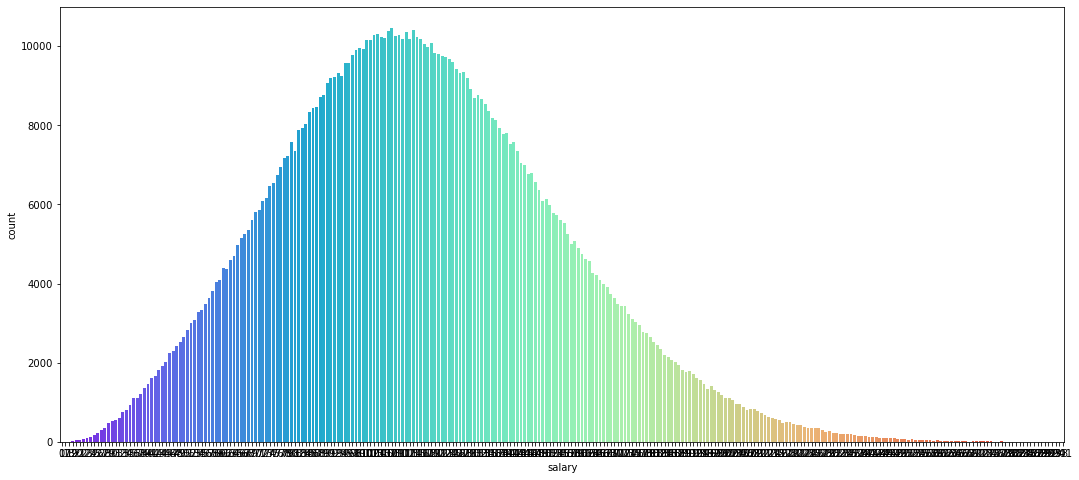

In [53]:
# count plot of whole datset based on salary


plt.figure(figsize=(18,8))
sns.countplot(x='salary',data=train_data,palette='rainbow')

From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

In [ ]:
# swarm plot for yearsExperience and milesFromMetropolis columnsplt.figure(figsize=(20,6)), data=train_data.iloc[1:50000]
plt.figure(figsize=(18,8))
sns.swarmplot(x='yearsExperience',y='milesFromMetropolis', data=train_data.iloc[1:50000],palette='rainbow')







From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

In [ ]:
# swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]


plt.figure(figsize=(18,8))
sns.swarmplot(x='yearsExperience',y='salary', data=train_data.iloc[1:50000],palette='rainbow')




from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

In [ ]:
# swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]


plt.figure(figsize=(18,8))
sns.swarmplot(x='milesFromMetropolis',y='salary', data=train_data.iloc[1:50000],palette='rainbow')



from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

In [ ]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns, data=train_data.iloc[1:50000]


plt.figure(figsize = (18,8))
sns.boxenplot(x = 'yearsExperience' , y= 'milesFromMetropolis' , data = train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x = 'yearsExperience' , y= 'milesFromMetropolis' , data = train_data.iloc[1:50000],palette='rainbow')
plt.show()




From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

In [ ]:
# combine boxen and swarm plot for yearsExperience and salary columns, data=train_data.iloc[1:50000]

plt.figure(figsize = (18,8))
sns.boxenplot(x = 'yearsExperience' , y= 'salary' , data = train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x = 'yearsExperience' , y= 'salary' , data = train_data.iloc[1:50000],palette='rainbow')




from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

In [ ]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns, data=train_data.iloc[1:50000]

plt.figure(figsize = (18,8))
sns.boxenplot(x = 'milesFromMetropolis' , y= 'salary' , data = train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x = 'milesFromMetropolis' , y= 'salary' , data = train_data.iloc[1:50000],palette='rainbow')





from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

In [ ]:
# strip plot between yearsExperience and salary columns




plt.figure(figsize = (18,8))
sns.stripplot(x = 'yearsExperience' , y= 'milesFromMetropolis' , data = train_data,palette='rainbow')


from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

In [ ]:
# strip plot between yearsExperience and salary columns


plt.figure(figsize = (18,8))
sns.stripplot(x = 'yearsExperience' , y= 'salary' , data = train_data,palette='rainbow')




from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

In [ ]:
# strip plot between milesFromMetropolis and salary columns






plt.figure(figsize = (18,8))
sns.stripplot(x = 'milesFromMetropolis' , y= 'salary' , data = train_data,palette='rainbow')



from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif
import statsmodels.api as sm

In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType', 'degree', 'major', 'industry','salary'],axis =1)


# target values
target = train_data['salary']



# numerical values column names
names = ['yearsExperience','milesFromMetropolis']


train_for_vif.dropna(inplace=True)
train_for_vif.columns






In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[: , train_for_vif.columns==names[i]]
  
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns!=names[1]]
  
  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  
  results = model.fit()
  
  # geting the r^2 value of results.
  rsq = results.rsquared
  
  # calculating vif value
  vif = round(1/(1-rsq),2)
  
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# the independent variables set
#X = train_data['yearsExperience','milesFromMetropolis']
  
# VIF dataframe
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns
  
# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
  
#print(vif_data)

Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

In [ ]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(18,8))
dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [ ]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)

In [ ]:
train_data

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [ ]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder,self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(),columns=new_columns, index= X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
# Split the labels and the target
train_X = train_data.drop(['yearsExperience','milesFromMetropolis','salary'],axis=1)
train_Y = train_data['salary']

In [ ]:
# Features

train_X.head()

In [ ]:
# Target

train_Y.head()


In [ ]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X =train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])


train_X.head()


In [ ]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_Y,test_size=0.2)

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())
    



# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
          m.score(X_train,Y_train),m.score(X_test,Y_test),
          median_absolute_error(m.predict(X_train),Y_train),median_absolute_error(m.predict(X_test),Y_test),
          metrics.mean_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test)]
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis = 0,ignore_index=True)
    


    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
            .sum()[['feature_importance']]\
            .sort_values('feature_importance',ascending=False).index[:50]
    
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize = (8,max(6,len(order)*.25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x')
    
    
    
    return fig, ax


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression


# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train,Y_train)

# print score of the model

print_score(lModel)

# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_,train_X)


### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor


# Instantiate the model
rf= RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X[1:50000])

### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor

from sklearn.neighbors import KNeighborsRegressor
# Instantiate the model
knnr = KNeighborsRegressor()


# print score of the model
knnr.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])



# print score of the model


print_score(knnr)


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Instantiate the model
GBR = GradientBoostingRegressor()





# print score of the model
GBR.fit(X_train,Y_train)

print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X)



### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()


# Instantiate the model
DTR.fit(X_train,Y_train)


# print score of the model


print_score(DTR)

### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor

from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()


# Instantiate the model

AdaBoost.fit(X_train,Y_train)

# print score of the model
print_score(AdaBoost)


# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_,train_X)


# visualizing the importance of features.


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [ ]:
pip install xgboost

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor

from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()


# Fit the model to the data
xgbr.fit(X_train,Y_train)


# print score of the model

print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X)



### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [ ]:
pip install lightgbm

In [ ]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm    
# Instantiate the model
lg =lgbm.LGBMRegressor()

# Fit the model to the data

lg.fit(X_train,Y_train)

# print score of the model
print_score(lm)


# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_,train_X)


### Comparing all the model based on metric

In [ ]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects 
    data = {'metrix':['rmse','medAE','MAE','R-squared']}
    
    df_train = pd.DataFrame(data)
    
    df_test =  pd.DataFrame(data)
    

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test)
       # then predict on the test set
      res = [rmse(model.predict(X_train),Y_train),rmse(model.predict(X_test),Y_test),
            metrics.median_absolute_error(model.predict(X_train),Y_train),metrics.median_absolute_error(model.predict(X_test),Y_test),
            metrics.mean_absolute_error(model.predict(X_train),Y_train),metrics.mean_absolute_error(model.predict(X_test),Y_test),
            metrics.r2_score(model.predict(X_train),Y_train),metrics.r2_score(model.predict(X_test),Y_test)]
    

      
      df_train[name] = [res[0],res[2],res[4],res[6]]
      
      df_test[name] =  [res[1],res[3],res[5],res[7]]
      
    return df_train,df_test

In [ ]:
# list of models object
# list of models name
models= [lModel,DTR,rf,knnr,GBR,xgbr,AdaBoost]

names = ['Lr','Dtree','Forest','Knn','GBR','Xboost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)


#### RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

    




#### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test
print("result on test data")
comp_model_test




## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=1) 
  # Fit the random search model
  random.fit(X_train[1:50000],Y_train[1:50000])
  
  print(random.best_params_)

In [ ]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(RandomForestRegressor(),X_train,Y_train,param_grid=rf_para_grid)



In [ ]:
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(),X_train,Y_train,param_grid=GBR_para_grid)



In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(),X_train,Y_train,param_grid=DTR_para_grid)





In [ ]:
# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv



random_Search(XGBRegressor(),X_train,Y_train,param_grid=XGB_para_grid)

## Using the best parameters and training the models

### Random Forest Regressor

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False})


# Fit the model to the data
rf.fit(X_train[1:50000],Y_train[1:50000])


# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X)


### Gradient Boosting Regressor

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25})





# print score of the model

GBR.fit(X_train[1:50000],Y_train[1:50000])
print_score(GBR)
# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X) 

### Decision Tree Regrsessor

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5.0})

# Instantiate the model

DTR.fit(X_train[1:50000],Y_train[1:50000])

# print score of the model

print_score(DTR)

### XGBoost Regressor

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr =XGBRegressor(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4})

# Fit the model to the data
xgbr.fit(X_train[1:50000],Y_train[1:50000])


# print score of the model

print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X)


## Comparing the metrics for tuned models

In [ ]:
models=[rf,DTR,GBR,xgbr]

names =['forest','Dtree','GBR','Xboost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)


In [ ]:
print("Metrics on train data")
comp_model_train



In [ ]:
print("Metrics on test data")
comp_model_test



### Now working with the test dataset provided

In [ ]:
# test data 
test_X = test_data



In [ ]:
test_X

In [ ]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']

test_X = scale_data(test_X,col_test)


In [ ]:
test_X

In [ ]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()

test_drop = test_data.drop(['jobType','degree','major','industry'],axis=1)


In [ ]:
test_X = encoder.fit_transform(test_X.drop(['yearsExperience','milesFromMetropolis'],axis=1))


In [ ]:
test_X = test_X.join(test_drop['yearsExperience'])
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head()


In [ ]:
# Perforn the prediction on the test dataset
y_predicted =lModel.predict(test_X)

y_predicted


In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)


In [ ]:
# predicted values in dataframe

predictions

### Conclusion
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.